## Observations and Insights 

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice in the DataFrame.
#taking len() of series made from .value_counts() will return number of unique mouse in the entire dataframe.
len(mouse_df["Mouse ID"].value_counts())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df2 = mouse_df.drop_duplicates(["Mouse ID", "Timepoint"],keep= False)
mouse_df2
mouse_min = mouse_df2.groupby(by="Mouse ID").min()
mouse_min.loc[mouse_min["Timepoint"] > 0]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,25,56.045564,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
#I chose to create a new column to indicate which mice were duplicated
mouse_df["Duplicated?"]= mouse_df.duplicated(subset=["Mouse ID", "Timepoint"])
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

final_df = mouse_df2[mouse_df2["Mouse ID"] != "g989"]
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [106]:
# Checking the number of mice in the clean DataFrame.
len(final_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

# I made 5 separate groupby's (aggregating under different function), 
# took out only that column then reset the index and renamed the columns to corresponding measurements were looking for.
mean = final_df.groupby("Drug Regimen").mean()[["Tumor Volume (mm3)"]].reset_index().rename(columns = {"Tumor Volume (mm3)": "mean"})
median = final_df.groupby("Drug Regimen").median()[["Tumor Volume (mm3)"]].reset_index().rename(columns = {"Tumor Volume (mm3)": "median"})
variance = final_df.groupby("Drug Regimen").var()[["Tumor Volume (mm3)"]].reset_index().rename(columns = {"Tumor Volume (mm3)": "var"})
stdev = final_df.groupby("Drug Regimen").std()[["Tumor Volume (mm3)"]].reset_index().rename(columns = {"Tumor Volume (mm3)": "std"})
sterror = final_df.groupby("Drug Regimen").sem()[["Tumor Volume (mm3)"]].reset_index().rename(columns = {"Tumor Volume (mm3)": "sem"})

# Then I merged the dataframes to create a dataframe.
merge1 = pd.merge(mean,median,on="Drug Regimen")
merge2 = pd.merge(merge1,variance, on="Drug Regimen")
merge3 = pd.merge(merge2,stdev,on="Drug Regimen")
finalmerge = pd.merge(merge3,sterror,on="Drug Regimen")
finalmerge


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

#Using groupby and then aggregating the Tumor Volumes with corresponding measurement returned nearly identical dataframe from 
#previous method
summary = final_df.groupby(by="Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', "std", "sem"]}).reset_index()
summary



Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

Text(0, 0.5, 'Total Count')

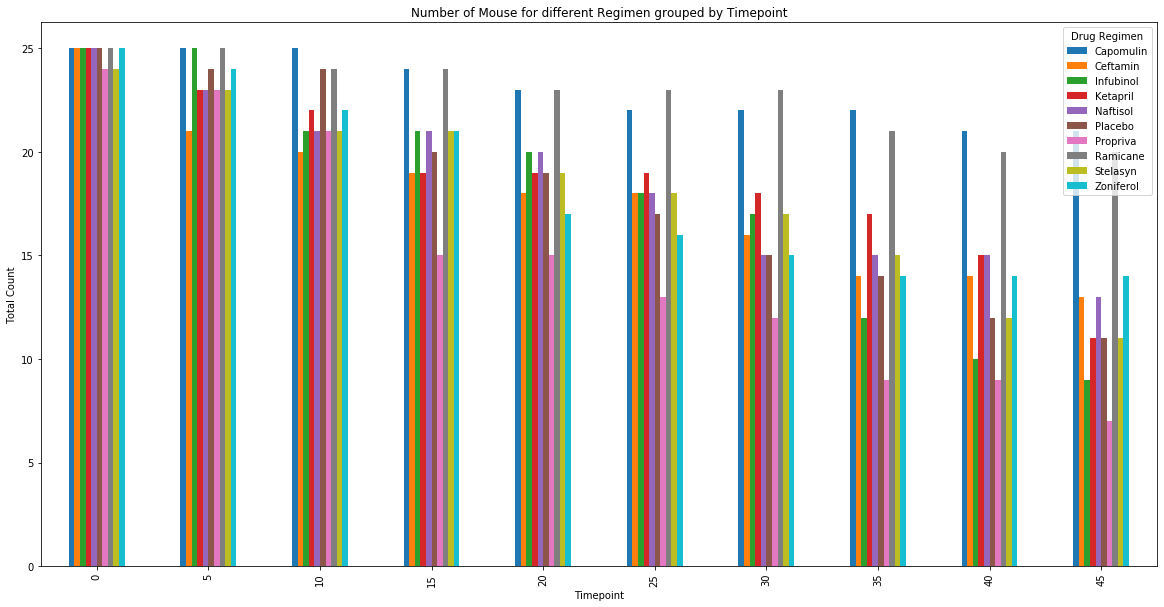

In [71]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_df = final_df.groupby(by=[ "Timepoint","Drug Regimen"]).count().unstack()
bar_chart = bar_df["Mouse ID"].plot(kind='bar',figsize=(20,10),title="Number of Mouse for different Regimen grouped by Timepoint")
bar_chart.set_ylabel("Total Count")


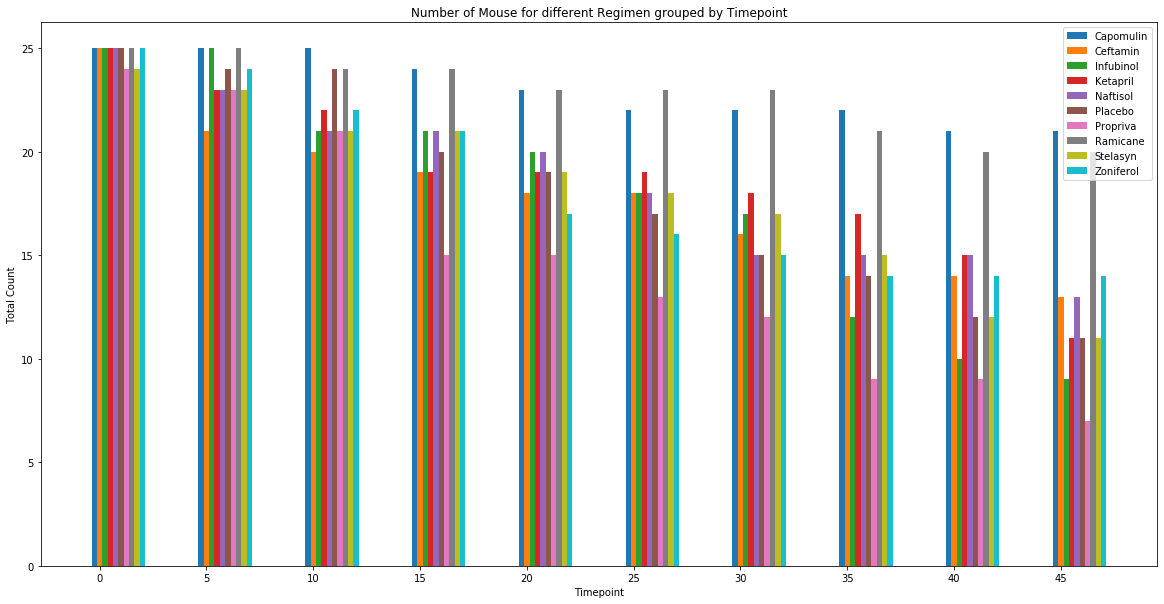

In [103]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# timezero = final_df.loc[final_df["Timepoint"] == 0][["Drug Regimen","Timepoint"]]
# timezero.groupby("Timepoint").count()

# timezero2 = final_df.loc[final_df["Timepoint"] == 5][["Drug Regimen","Timepoint"]]
# timezero.groupby("Drug Regimen").count()

# plt.bar(timezero, timezero["Timepoint"])

bar_df = final_df.groupby(by=[ "Timepoint","Drug Regimen"])["Mouse ID"].count().unstack()
transposed_df =bar_df.transpose()

transposed_df

barwidth =.05

#height
bar1 = bar_df["Capomulin"]
bar2 = bar_df["Ceftamin"]
bar3 = bar_df["Infubinol"]
bar4 = bar_df["Ketapril"]
bar5 = bar_df["Naftisol"]
bar6 = bar_df["Placebo"]
bar7 = bar_df["Propriva"]
bar8 = bar_df["Ramicane"]
bar9 = bar_df["Stelasyn"]
bar10 = bar_df["Zoniferol"]

#position of bars
r1 = np.arange(len(bar1))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
r4 = [x + barwidth for x in r3]
r5 = [x + barwidth for x in r4]
r6 = [x + barwidth for x in r5]
r7 = [x + barwidth for x in r6]
r8 = [x + barwidth for x in r7]
r9 = [x + barwidth for x in r8]
r10 = [x + barwidth for x in r9]

#plot the bar charts
plt.figure(figsize=(20,10))
plt.bar(r1, bar1, width= barwidth, label="Capomulin")
plt.bar(r2, bar2, width= barwidth, label="Ceftamin")
plt.bar(r3, bar3, width= barwidth, label="Infubinol")
plt.bar(r4, bar4, width= barwidth, label="Ketapril")
plt.bar(r5, bar5, width= barwidth, label="Naftisol")
plt.bar(r6, bar6, width= barwidth, label="Placebo")
plt.bar(r7, bar7, width= barwidth, label="Propriva")
plt.bar(r8, bar8, width= barwidth, label="Ramicane")
plt.bar(r9, bar9, width= barwidth, label="Stelasyn")
plt.bar(r10, bar10, width= barwidth, label="Zoniferol")

plt.xlabel("Timepoint")
plt.ylabel("Total Count")
plt.title("Number of Mouse for different Regimen grouped by Timepoint")
plt.legend()
plt.xticks([y + barwidth for y in range(len(bar1))], ["0","5","10","15","20","25","30","35","40","45"])
plt.show()

## Pie Plots

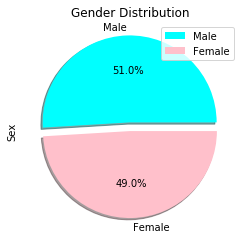

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_piechart = final_df["Sex"].value_counts()
Gender_piechart.plot(kind="pie",
                     y="Gender",
                     title="Gender Distribution",
                     legend=True,
                     colors=["aqua", "pink"],
                     explode=[0.1, 0],
                     autopct="%1.1f%%",
                     shadow=True,
                     )

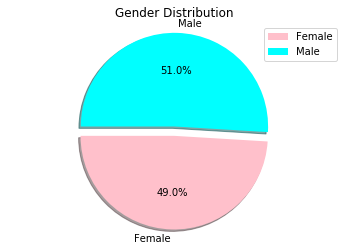

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
groupbygen =final_df.groupby("Sex").count().reset_index()[["Sex", "Mouse ID"]]
sex = groupbygen["Sex"].tolist()
sex_count =  groupbygen["Mouse ID"].tolist()
plt.pie(
    sex_count, 
    labels=sex,         
    explode=[0.1, 0],          
    colors=["pink", "aqua"],
    autopct="%1.1f%%",         
    shadow=True, 
    startangle=180
)
plt.legend()
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#I first used drop_duplicates to leave only the last of the same Mouse ID and only took the three columns relevant
tumor = final_df.drop_duplicates(subset="Mouse ID", keep='last')[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]

#Find the average of last timepoint for each regimen in order to find out the four most "promising treatment regiments"
tumor.groupby("Drug Regimen").mean().sort_values(by = "Tumor Volume (mm3)", ascending = True)


#Ramicane, Capomulin, Propriva and Ceftamin seems to be the most promising Drug Regimen in terms of tumor volumes

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,36.191390
Capomulin,36.667568
Propriva,56.493884
Ceftamin,57.753977
Infubinol,58.178246
Zoniferol,59.181258
Placebo,60.508414
Stelasyn,61.001707
Naftisol,61.205757


In [16]:
#Ramicane outlier detection
#First isolate only the data that had Drug Regimen equaling Ramicane
Ramicane = tumor.loc[(tumor["Drug Regimen"] == "Ramicane")]

#Then, I took the Tumor volume column and set quantiles
Ramicane_quartiles = Ramicane["Tumor Volume (mm3)"].quantile(q=[.25,.5,.75])
#Set variables for lower and upper quartiles
Ramicane_lowerq = Ramicane_quartiles[.25]
Ramicane_upperq = Ramicane_quartiles[.75]

#Find the interquartile range
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq

#Set lower and upper bound by adding or subtracting 1.5 * Interquartile range to upper and lower bound
Ramicane_upperb = Ramicane_upperq + 1.5*Ramicane_iqr
Ramicane_lowerb = Ramicane_lowerq - 1.5*Ramicane_iqr

#I used np.where to add a column next to Tumor volume, indicating whether each observations were outliers
Ramicane["Outlier?"] = np.where((Ramicane['Tumor Volume (mm3)'] 
                                 >Ramicane_upperb) | 
                                (Ramicane['Tumor Volume (mm3)'] 
                                 <Ramicane_lowerb), 'yes', 'no'
                               )

#Took only the Tumor volume column to use it later to create a boxplot
Ramicane_tumor = Ramicane['Tumor Volume (mm3)']

#Final Resulting dataframe containing outlier detection
Ramicane.head()

C:\Users\totor\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Outlier?
9,k403,Ramicane,22.050126,no
49,g791,Ramicane,29.128472,no
59,s508,Ramicane,30.276232,no
74,m546,Ramicane,30.564625,no
84,z578,Ramicane,30.638696,no


In [17]:
#Capomulin outlier detection
#First isolate only the data that had Drug Regimen equaling Capomulin
Capomulin = tumor.loc[(tumor["Drug Regimen"] == "Capomulin")]

#Then, I took the Tumor volume column and set quantiles
Capomulin_quartiles = Capomulin["Tumor Volume (mm3)"].quantile(q=[.25,.5,.75])

#Set variables for lower and upper quartiles
Capomulin_lowerq = Capomulin_quartiles[.25]
Capomulin_upperq = Capomulin_quartiles[.75]

#Find the interquartile range
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq

#Set lower and upper bound by adding or subtracting 1.5 * Interquartile range to upper and lower bound
Capomulin_upperb = Capomulin_upperq + 1.5*Capomulin_iqr
Capomulin_lowerb = Capomulin_lowerq - 1.5*Capomulin_iqr

#I used np.where to add a column next to Tumor volume, indicating whether each observations were outliers
Capomulin["Outlier?"] = np.where((Capomulin['Tumor Volume (mm3)'] 
                                 >Capomulin_upperb) | 
                                (Capomulin['Tumor Volume (mm3)'] 
                                 <Capomulin_lowerb), 'yes', 'no'
                                  )

#Took only the Tumor volume column to use it later to create a boxplot                              
Capomulin_tumor = Capomulin['Tumor Volume (mm3)']

#Final Resulting dataframe containing outlier detection
Capomulin.head()

C:\Users\totor\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Outlier?
19,s185,Capomulin,23.343598,no
29,x401,Capomulin,28.484033,no
39,m601,Capomulin,28.430964,no
64,f966,Capomulin,30.485985,no
104,u364,Capomulin,31.023923,no


In [18]:
#Propriva outlier detection

#First isolate only the data that had Drug Regimen equaling Propriva 
Propriva = tumor.loc[(tumor["Drug Regimen"] == "Propriva")]

#Then, I took the Tumor volume column and set quantiles
Propriva_quartiles = Propriva["Tumor Volume (mm3)"].quantile(q=[.25,.5,.75])
Propriva_quartiles
#Set variables for lower and upper quartiles
Propriva_lowerq = Propriva_quartiles[.25]
Propriva_upperq = Propriva_quartiles[.75]

#Find the interquartile range
Propriva_iqr = Propriva_upperq - Propriva_lowerq

#Set lower and upper bound by adding or subtracting 1.5 * Interquartile range to upper and lower bound
Propriva_upperb = Propriva_upperq + 1.5*Propriva_iqr
Propriva_lowerb = Propriva_lowerq - 1.5*Propriva_iqr

#I used np.where to add a column next to Tumor volume, indicating whether each observations were outliers
Propriva["Outlier?"] = np.where((Propriva['Tumor Volume (mm3)'] 
                                 >Propriva_upperb) | 
                                (Propriva['Tumor Volume (mm3)'] 
                                 <Propriva_lowerb), 'yes', 'no'
                               )

#Took only the Tumor volume column to use it later to create a boxplot
Propriva_tumor = Propriva['Tumor Volume (mm3)']

#Final Resulting dataframe containing outlier detection
Propriva.head()

C:\Users\totor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Outlier?
550,a699,Propriva,62.191414,no
751,c927,Propriva,64.183229,no
893,g558,Propriva,61.774963,no
903,g570,Propriva,70.492788,no
962,i635,Propriva,58.633404,no


In [19]:
#Ceftamin outlier detection
#First isolate only the data that had Drug Regimen equaling Ceftamin
Ceftamin = tumor.loc[(tumor["Drug Regimen"] == "Ceftamin")]

#Then, I took the Tumor volume column and set quantiles
Ceftamin_quartiles = Ceftamin["Tumor Volume (mm3)"].quantile(q=[.25,.5,.75])
Ceftamin_quartiles

#Set variables for lower and upper quartiles
Ceftamin_lowerq = Ceftamin_quartiles[.25]
Ceftamin_upperq = Ceftamin_quartiles[.75]

#Find the interquartile range
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq

#Set lower and upper bound by adding or subtracting 1.5 * Interquartile range to upper and lower bound
Ceftamin_upperb = Ceftamin_upperq + 1.5*Ceftamin_iqr
Ceftamin_lowerb = Ceftamin_lowerq - 1.5*Ceftamin_iqr

#I used np.where to add a column next to Tumor volume, indicating whether each observations were outliers
Ceftamin["Outlier?"] = np.where((Ceftamin['Tumor Volume (mm3)'] 
                                 >Ceftamin_upperb) | 
                                (Ceftamin['Tumor Volume (mm3)'] 
                                 <Ceftamin_lowerb), 'yes', 'no'
                               )

#Took only the Tumor volume column to use it later to create a boxplot
Ceftamin_tumor = Ceftamin['Tumor Volume (mm3)']

#Final Resulting dataframe containing outlier detection
Ceftamin.head()

C:\Users\totor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Outlier?
493,a275,Ceftamin,62.999356,no
594,b447,Ceftamin,45.000000,no
600,b487,Ceftamin,56.057749,no
617,b759,Ceftamin,55.742829,no
840,f436,Ceftamin,48.722078,no


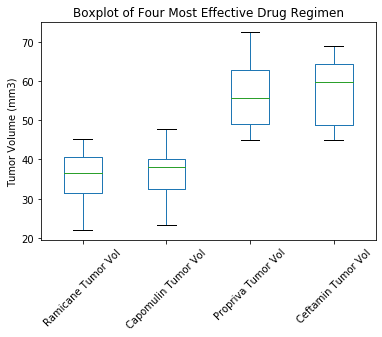

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Creating a dictionary with series I made from pervious outlier detection section 
#(By only saving Tumor Volumes from final_df)
frame = {"Ramicane Tumor Vol": Ramicane_tumor,
         "Capomulin Tumor Vol" :Capomulin_tumor,
         "Propriva Tumor Vol": Propriva_tumor,
         "Ceftamin Tumor Vol": Ceftamin_tumor}

#Pass it into a pd.DataFrame to create a Dataframe. NaN values do not matter at
#this point since we are only plotting available distribution values in the end.
tumor_df = pd.DataFrame(frame)

#Use pandas plot, rotate the labels in order to prevent overlapping, set title, and y axis label)
tumor_df.plot(kind="box",rot=45)
plt.title("Boxplot of Four Most Effective Drug Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

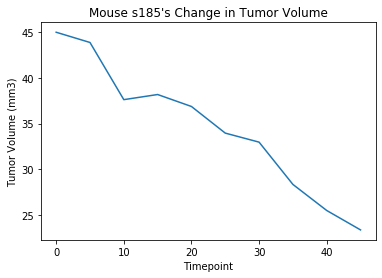

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Since a specific mouse was not assigned, I chose a random mouse from 
#Capomulin by Mouse ID and use .loc to only get the data for s185
Capomulin_plot = final_df.loc[final_df["Mouse ID"] == "s185"]

#Set x and y axis by taking series (Time point and Tumor Volume) out from previously generated dataframe
x_axis = Capomulin_plot["Timepoint"]
y_axis = Capomulin_plot["Tumor Volume (mm3)"]

#Used Matplotlib to plot a line plot by passing x_axis and y axis, make title and x,y labels
plt.plot(x_axis, y_axis)
plt.title("Mouse s185's Change in Tumor Volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



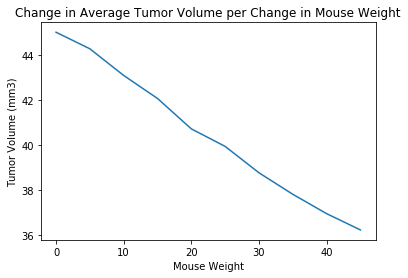

In [23]:
#This graph is the Change in AVERAGE tumor volume per change in Timepoint. I thought this was more interesting to show
#This is not part of the homework!!!!
Capomulin_plot = final_df.loc[final_df["Drug Regimen"] == "Capomulin"]
Capomulin_group = Capomulin_plot.groupby("Timepoint").mean().reset_index()
x_axis = Capomulin_group["Timepoint"]
y_axis = Capomulin_group["Tumor Volume (mm3)"]
plt.title("Change in Average Tumor Volume per Change in Mouse Weight")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)
plt.show()

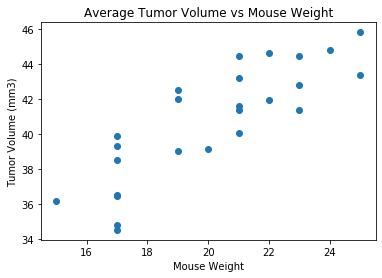

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#First, I isolated the dataset by using iloc and boolean filter, 
#keeping only that belonged to Capomulin in Drug Regimen
Capomulin_plot = final_df.loc[final_df["Drug Regimen"] == "Capomulin"]

#Grouped the data by Mouse ID and took the mean of weight and tumor volume
Capomulin_group_id = Capomulin_plot.groupby("Mouse ID").mean().reset_index()
Capomulin_group_id

#Set x_axis to weight and y to Tumor Volume
x_axis = Capomulin_group_id["Weight (g)"]
y_axis = Capomulin_group_id["Tumor Volume (mm3)"]

#Set title, x/y label, and plot by using plt.scatter
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(x_axis, y_axis)
plt.show()

## Correlation and Regression

y = 0.95x + 21.55


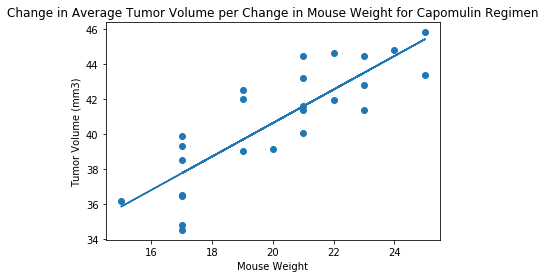

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Import stats from scipy library
from scipy import stats

#Since x and y variables were already set from previous example,
#I directly went to linear regression, and saved the values accordingly
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)    
regress_values = x_axis * slope + intercept

#Formulate a linear regression in string format using the values gottem from stats.linregress
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot both data points and regression line to see how fit the line is to the datapoints.
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values)

# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Set titles, x/y labels and show the graph and also print out the regression line
plt.title("Change in Average Tumor Volume per Change in Mouse Weight for Capomulin Regimen")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')

print(line_eq)
plt.show()

In [27]:
#Observation 1 
observation = final_df.drop_duplicates(subset="Mouse ID", keep = "first")
observation["Drug Regimen"].value_counts()
#One of the most important thing about a panel data is that the number of observations be the same throughout all the different comparing variable.
#Since the most important variable we are trying to compare was change in tumor volumes for different Drug Regimen, the number of mouse per Drug Regimen
#However, I did notice that both Stelasyn and Propriva had 1 less mouse to begin with, and it would have been nicer if they equalled out to be 25 for each regimen.
#It seems one of the mouse was the g989 we deleted due to duplicate issues and one was omitted from the beginning, since we started with 249 mice.
#In the end, since we have close to 2000 observations, this might not mean much.
#This is obersvable both by the above calculation and the bar chart.

Zoniferol    25
Ceftamin     25
Placebo      25
Infubinol    25
Capomulin    25
Naftisol     25
Ketapril     25
Ramicane     25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

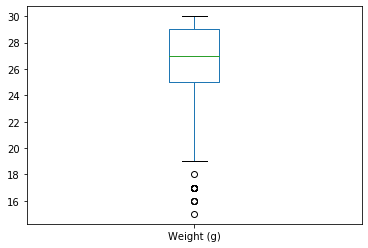

In [28]:
#Observation 2
observation["Weight (g)"].plot(kind="box")
#The below boxchart shows the distribution of initial weight of all 248 mice (Timepoint=0)
#As seen by the boxchart, the distribution is quite large, with some even being considered outliers.
#The weight of a mouse can (and should) impact the overall impact of Drug used on them as well as the end point.
#I am not quite certain if our analysis adjusts for these kind of controls

In [104]:
#Observation 3
finalmerge
# In terms of most useful Drug Regimen, Capomulin and Ramicane seem to be two of the most effect drugs against SCC skin cancer.
#This is observable both in the bar chart and the summary statistics table. The end timepoint (45 days) tells us that mice treated with
#These two drugs had the highest survival rate compared to the 8 other tested drugs.
#Looking at the summary table, both mean and standard deviation is significantly lower than that of other drugs, while Standard Error of the mean
#also is significantly lower than that of other drugs, meaning that the Capomulin and Ramicane will likely to be less far from the true population mean.
#

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
